<a href="https://colab.research.google.com/github/spros1/HeartFailureAnalysis/blob/main/ExcerA_Heart_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   Start the commands in order to load a file from Kaggle to Colab

---


In [1]:
pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sprospap","key":"9a4854805a9655a32d9fa00b6ca4aa15"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 7.12MB/s]


In [6]:
ls

heart-failure-clinical-data.zip  kaggle.json  sample_data/


In [7]:
! unzip heart-failure-clinical-data.zip

Archive:  heart-failure-clinical-data.zip
  inflating: heart_failure_clinical_records_dataset.csv  




2.   Check the data and import them to SqlDatabase

---




In [8]:
# Check dataset 
import pandas as pd
from google.colab import files
with open('heart_failure_clinical_records_dataset.csv', 'r') as data:
    df3 = pd.read_csv(data, encoding = ('ansi'))
    print (df3)

      age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
0    75.0        0                       582  ...        0     4            1
1    55.0        0                      7861  ...        0     6            1
2    65.0        0                       146  ...        1     7            1
3    50.0        1                       111  ...        0     7            1
4    65.0        1                       160  ...        0     8            1
..    ...      ...                       ...  ...      ...   ...          ...
294  62.0        0                        61  ...        1   270            0
295  55.0        0                      1820  ...        0   271            0
296  45.0        0                      2060  ...        0   278            0
297  45.0        0                      2413  ...        1   280            0
298  50.0        0                       196  ...        1   285            0

[299 rows x 13 columns]


### Create an instance of Database and load to table the CSV

In [9]:
# create the SQLite Database
%pip install csv-to-sqlite

In [10]:
# import to table 
!csv-to-sqlite -f heart_failure_clinical_records_dataset.csv -t full -o db.sqlite

Written 299 rows into 1 tables in 0.017 seconds


### Accessing Database - Copy data to dataframe


In [11]:
#Accessing the SQL Database
import sqlite3

In [12]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

In [13]:
conn = create_connection("db.sqlite")

In [14]:
import pandas as pd 

cur = conn.cursor()
cur.execute(f"SELECT * FROM heart_failure_clinical_records_dataset " )
df = pd.DataFrame(cur.fetchall(), columns= [ 'Age', 'Anaemia', 'Creatinine_Phosphokinase', 'Diabetes', 'Ejection_Fraction', 'High_Blood_Pressure', 'Platelets', 'Serum_creatinine', 'Serum_Sodium', 'Sex', 'Smoking', 'Time', 'Death_Event'] )

print(df)

      Age  Anaemia  Creatinine_Phosphokinase  ...  Smoking  Time  Death_Event
0    75.0        0                       582  ...        0     4            1
1    55.0        0                      7861  ...        0     6            1
2    65.0        0                       146  ...        1     7            1
3    50.0        1                       111  ...        0     7            1
4    65.0        1                       160  ...        0     8            1
..    ...      ...                       ...  ...      ...   ...          ...
294  62.0        0                        61  ...        1   270            0
295  55.0        0                      1820  ...        0   271            0
296  45.0        0                      2060  ...        0   278            0
297  45.0        0                      2413  ...        1   280            0
298  50.0        0                       196  ...        1   285            0

[299 rows x 13 columns]


We now have the data base in SQLite, and the dataframe df ready to use in python

### Start Data Analysis


In [15]:
df.head()

,Age,Anaemia,Creatinine_Phosphokinase,Diabetes,Ejection_Fraction,High_Blood_Pressure,Platelets,Serum_creatinine,Serum_Sodium,Sex,Smoking,Time,Death_Event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       299 non-null    float64
 1   Anaemia                   299 non-null    int64  
 2   Creatinine_Phosphokinase  299 non-null    int64  
 3   Diabetes                  299 non-null    int64  
 4   Ejection_Fraction         299 non-null    int64  
 5   High_Blood_Pressure       299 non-null    int64  
 6   Platelets                 299 non-null    float64
 7   Serum_creatinine          299 non-null    float64
 8   Serum_Sodium              299 non-null    int64  
 9   Sex                       299 non-null    int64  
 10  Smoking                   299 non-null    int64  
 11  Time                      299 non-null    int64  
 12  Death_Event               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [17]:
# search for missing values -- no missing values
df.isnull().sum()

Age                         0
Anaemia                     0
Creatinine_Phosphokinase    0
Diabetes                    0
Ejection_Fraction           0
High_Blood_Pressure         0
Platelets                   0
Serum_creatinine            0
Serum_Sodium                0
Sex                         0
Smoking                     0
Time                        0
Death_Event                 0
dtype: int64

In [18]:
# ckeck statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
Anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
Creatinine_Phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
Diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
Ejection_Fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
High_Blood_Pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
Platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
Serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
Serum_Sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
Sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [19]:
# view total values order by age
df.sort_values(by='Age')

,Age,Anaemia,Creatinine_Phosphokinase,Diabetes,Ejection_Fraction,High_Blood_Pressure,Platelets,Serum_creatinine,Serum_Sodium,Sex,Smoking,Time,Death_Event
269,40.0,0,582,1,35,0,222000.00,1.00,132,1,0,244,0
232,40.0,1,129,0,35,0,255000.00,0.90,137,1,0,209,0
180,40.0,0,478,1,30,0,303000.00,0.90,136,1,0,148,0
242,40.0,0,90,0,35,0,255000.00,1.10,136,1,1,212,0
248,40.0,0,624,0,35,0,301000.00,1.00,142,1,1,214,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,90.0,1,60,1,50,0,226000.00,1.00,134,1,0,30,1
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
30,94.0,0,582,1,38,1,263358.03,1.83,134,1,0,27,1
55,95.0,1,371,0,30,0,461000.00,2.00,132,1,0,50,1


In [20]:
import matplotlib as plt
import seaborn as sns

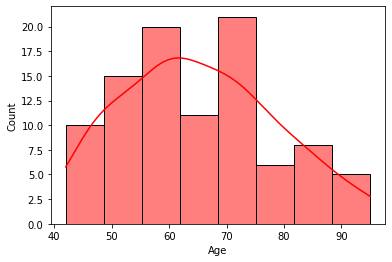

In [21]:
### relationship between age and deaths 
sns.histplot(df[df.Death_Event == 1].Age, kde=True, color="red")


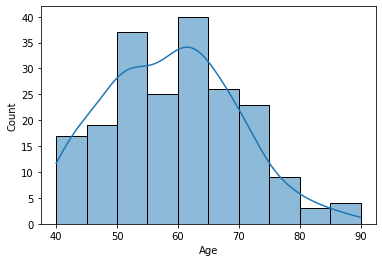

In [22]:
sns.histplot(df[df.Death_Event == 0].Age, kde=True)

###No problem found in dataset so we can proceed with the calculations



In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [24]:
# delete time feature to be the same with method in paper
df_without_time = df.drop(columns='Time')

# create 
x = df_without_time.drop(columns='Death_Event')
y = df_without_time['Death_Event']

In [25]:
# run random forest method
model = RandomForestClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.15561495 0.02280534 0.12238992 0.01953581 0.18277125 0.02329198
 0.12352054 0.1992902  0.11175085 0.01999074 0.01903841]


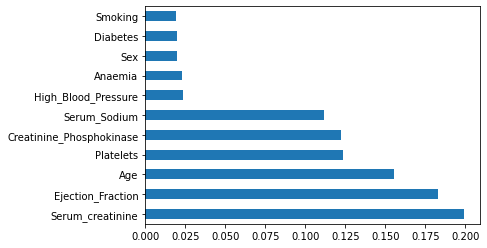

In [26]:
# results in visual
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

###Now lets create the accuracy score

In [27]:
# Now find accuracy 
inp_data = df_without_time.drop(columns='Death_Event')
out_data = df_without_time[['Death_Event']]

# split to 70 - 30 % as the paper
X_train, X_test, y_train, y_test = train_test_split(inp_data, out_data, test_size=0.3, random_state=0)

## Applying Transformer
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (209, 11)
X_test Shape  :  (90, 11)
y_train Shape :  (209, 1)
y_test Shape  :  (90, 1)


In [28]:
def result(clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
    print('Random Forest Classifier f1-score      : {:.4f}'.format(f1_score( y_test , y_pred)))
    print('Random Forest Classifier precision     : {:.4f}'.format(precision_score(y_test, y_pred)))
    print('Random Forest Classifier recall        : {:.4f}'.format(recall_score(y_test, y_pred)))
    print("Random Forest Classifier roc auc score : {:.4f}".format(roc_auc_score(y_test,y_pred)))
    print("\n",classification_report(y_pred, y_test))

In [29]:
def sample_result( n_estimators = 100, max_features ='auto', max_depth = None, min_samples_split=11 ):    
    
    scores = [] 
    for i in range(0,100): # 100 samples
        n_estimators, max_features, max_depth, min_samples_split
        X_train, X_test, y_train, y_test = train_test_split(inp_data, out_data, test_size=0.3)
        clf = RandomForestClassifier(n_estimators      = n_estimators,
                                     max_features      = max_features,
                                     max_depth         = max_depth,
                                     min_samples_split = min_samples_split) 
        sc      = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test  = sc.fit_transform(X_test)
        clf.fit(X_train, y_train)
        scores.append(accuracy_score(clf.predict(X_test), y_test)) 

    plt.hist(scores)
    plt.show()
    print("Best Score: {}\nMean Score: {}".format(np.max(scores), np.mean(scores)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy Score: 0.7444
Random Forest Classifier f1-score      : 0.5490
Random Forest Classifier precision     : 0.6087
Random Forest Classifier recall        : 0.5000
Random Forest Classifier roc auc score : 0.6774

               precision    recall  f1-score   support

           0       0.85      0.79      0.82        67
           1       0.50      0.61      0.55        23

    accuracy                           0.74        90
   macro avg       0.68      0.70      0.69        90
weighted avg       0.76      0.74      0.75        90



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y wa

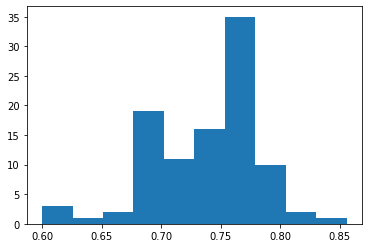

Best Score: 0.8555555555555555
Mean Score: 0.7374444444444446


In [30]:
clf = RandomForestClassifier(random_state=0)
result(clf)
sample_result()

### NOW lets go to PCA 
Apply PCA on the continuous variables to get better visualizations. We use PCA to reduce the dimensionality of the dataset. PCA accomplishes this by capturing the variance in the dataset. It get the components such that the are in the direction of the highest variance.

In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score

In [32]:
cont_cols = ['Creatinine_Phosphokinase', 'Platelets','Serum_creatinine', 'Serum_Sodium', 'Ejection_Fraction','Age']
cat_vars = ['Anaemia', 'Diabetes', 'High_Blood_Pressure', 'Sex', 'Smoking','Death_Event']

In [33]:
# find min max value for continious features

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_without_time[['Creatinine_Phosphokinase', 'Platelets','Serum_creatinine', 'Serum_Sodium', 'Ejection_Fraction','Age']])
scaled_df = df_without_time.copy()
scaled_df[cont_cols] = scaled_features
scaled_df.head()

,Age,Anaemia,Creatinine_Phosphokinase,Diabetes,Ejection_Fraction,High_Blood_Pressure,Platelets,Serum_creatinine,Serum_Sodium,Sex,Smoking,Death_Event
0,0.636364,0,0.071319,0,0.090909,1,0.290823,0.157303,0.485714,1,0,1
1,0.272727,0,1.000000,0,0.363636,0,0.288833,0.067416,0.657143,1,0,1
2,0.454545,0,0.015693,0,0.090909,0,0.165960,0.089888,0.457143,1,1,1
3,0.181818,1,0.011227,0,0.090909,0,0.224148,0.157303,0.685714,1,0,1
4,0.454545,1,0.017479,1,0.090909,0,0.365984,0.247191,0.085714,0,0,1


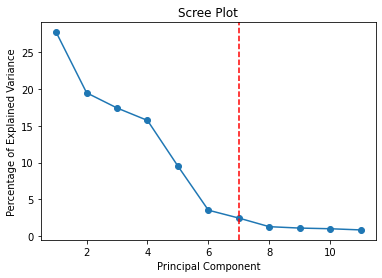

In [34]:

pca_data = scaled_df.drop(columns='Death_Event')
pca1 = PCA()
pca1.fit(pca_data)

percentage_variance = np.round(pca1.explained_variance_ratio_ * 100, decimals=2)
xlabels = ['PC' + str(x) for x in range(1, len(percentage_variance)+1)]

plt.plot(range(1,len(percentage_variance)+1), percentage_variance, '-o')
plt.axvline(x=7, color='red', linestyle='--')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [35]:
pca95 = PCA(n_components=0.95)
pca95.fit_transform(pca_data).shape

(299, 7)

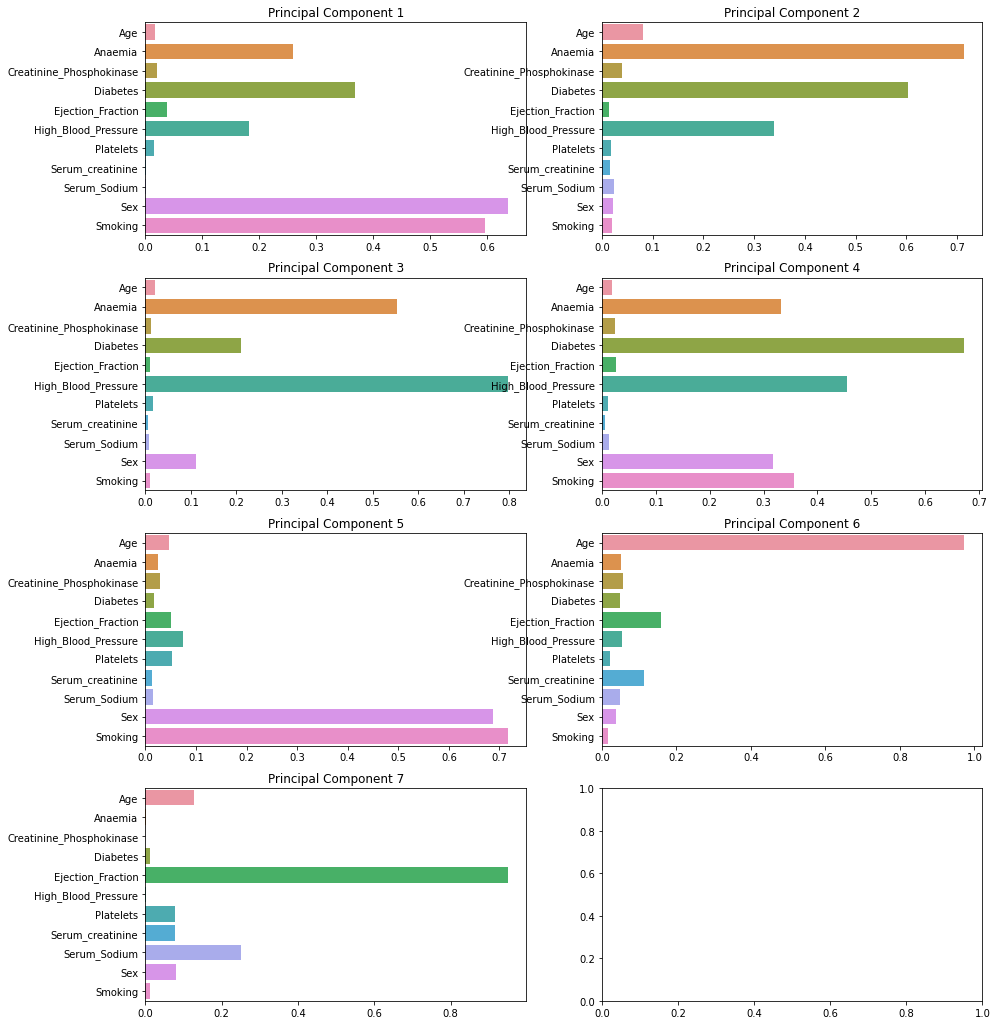

In [36]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 18))

row = -1; col = 0
for i in range(0,7):
    
    if(i%2 == 0): 
        col = 0
        row = row + 1
    else: 
        col=1
    
    sns.barplot(x=abs(pca1.components_[i]), y=pca_data.columns, orient='h', ax=ax[row][col])
    ax[row][col].set_title('Principal Component ' + str(i+1))

In [37]:
ori_accuracy = []
pca_accuracy = []

# Without PCA
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=3, criterion='gini', random_state=42)
rf_clf = rf_clf.fit(X_train, y_train)
ori_accuracy.append(np.mean(cross_val_score(rf_clf, X_train, y_train, cv=5)))

# With PCA
pca95 = PCA(n_components=0.95)
X_train_reduced = pca95.fit_transform(X_train)
X_test_reduced = pca95.transform(X_test)

rf_clf_pca = RandomForestClassifier(n_estimators=200, max_depth=3, criterion='gini', random_state=42)
rf_clf_pca = rf_clf_pca.fit(X_train_reduced, y_train)
pca_accuracy.append(rf_clf_pca.score(X_test_reduced, y_test))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

In [ ]:

print('                  Original           With PCA')
print('---------------------------------------------------')
print('Random Forest      %.4f' % ori_accuracy[0], ' '*11, '%.4f'%pca_accuracy[0])

                  Original           With PCA
---------------------------------------------------
Random Forest      0.7321             0.6778


Accuracy of random forest drops after the PCA